In [1]:
import pandas as pd
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [5]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

<Axes: >

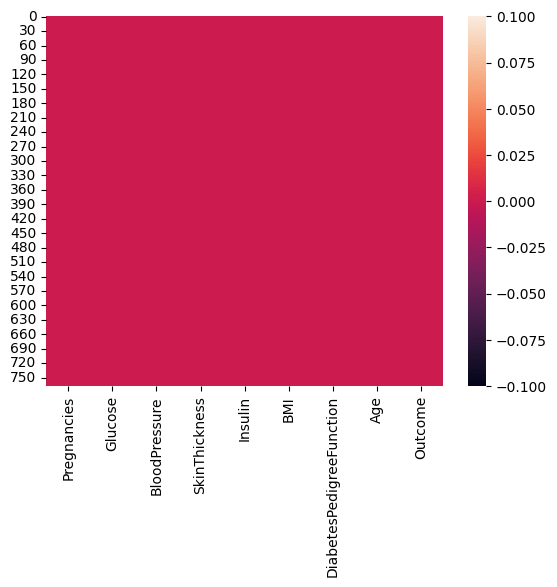

In [9]:
sns.heatmap(df.isna())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

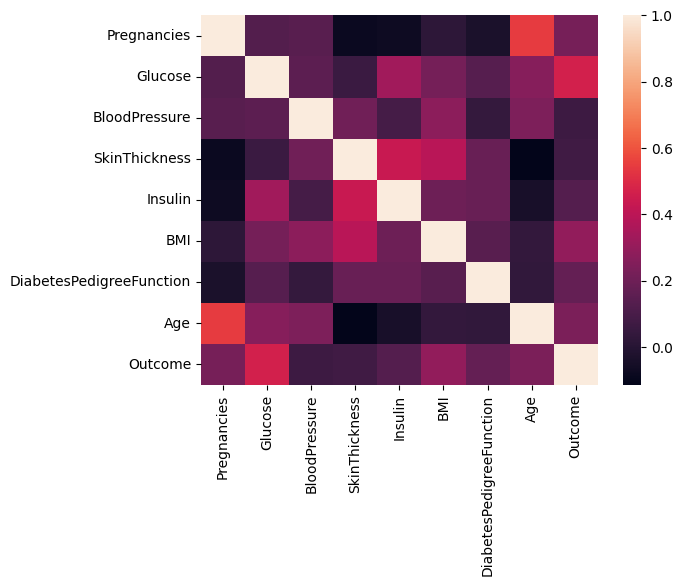

In [11]:
sns.heatmap(df.corr())

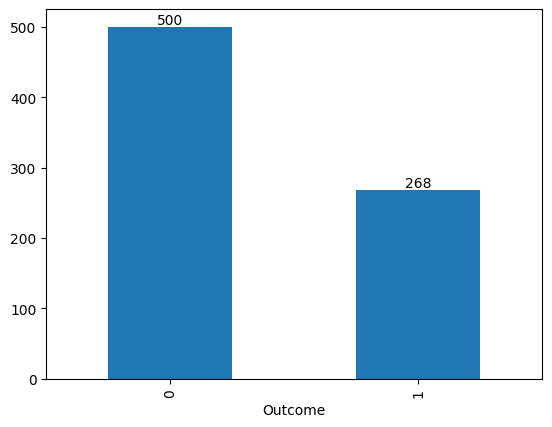

In [12]:
graph = df["Outcome"].value_counts().plot(kind = "bar")
for i in graph.containers :
    plt.bar_label(i)

**This shows the data set we are having in which only 268 patients are Diabetic patients**

In [13]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**The patients who are having 4 or more than 4 pregencies are likly having more chances to be diabetic.**

**Those who are having high glucose levels are likly having more chances to be diabetic.**

**Those patients who are phasiing obesity problems are likely having more chance to be a Diabetic.**

**Those who are more than 37 or 38 years are having more chances to be Diabetic.**

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
grouped = df.groupby("Pregnancies")["Outcome"].value_counts()
data = grouped.reset_index(name = "count_of_peoples")
data 

,Pregnancies,Outcome,count_of_peoples
0,0,0,73
1,0,1,38
2,1,0,106
3,1,1,29
4,2,0,84
5,2,1,19
6,3,0,48
7,3,1,27
8,4,0,45
9,4,1,23


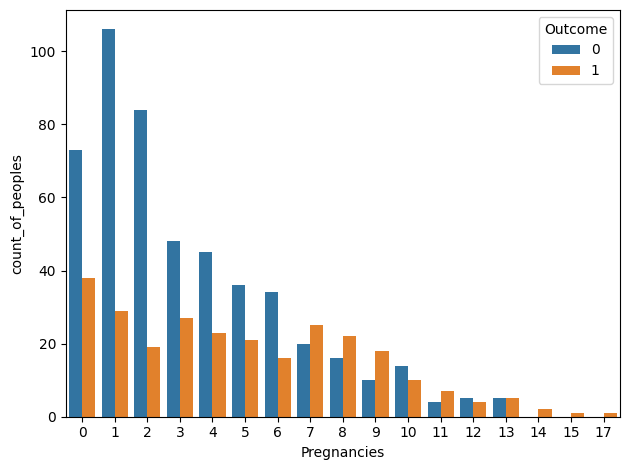

In [16]:
graph = sns.barplot(x= data["Pregnancies"] , y= data["count_of_peoples"] , hue= data["Outcome"])
plt.tight_layout()

**Above graph is showing higher the number of pregnecies higher the chances to be Diabetic.**

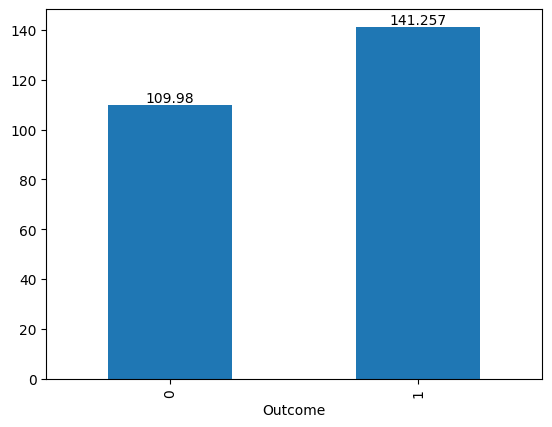

In [17]:
graph = df.groupby("Outcome")["Glucose"].mean().plot(kind ="bar")
for label in graph.containers:
    plt.bar_label(label)

Text(0.5, 0, 'Number of Peoples')

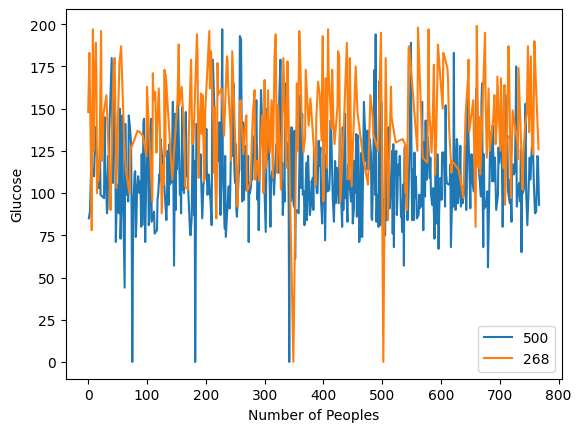

In [18]:
df.groupby("Outcome")["Glucose"].plot()
plt.legend(df["Outcome"].value_counts())
plt.ylabel("Glucose")
plt.xlabel("Number of Peoples")

**we clearly see people having higher glucose are higher chances to be Diabetic**

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


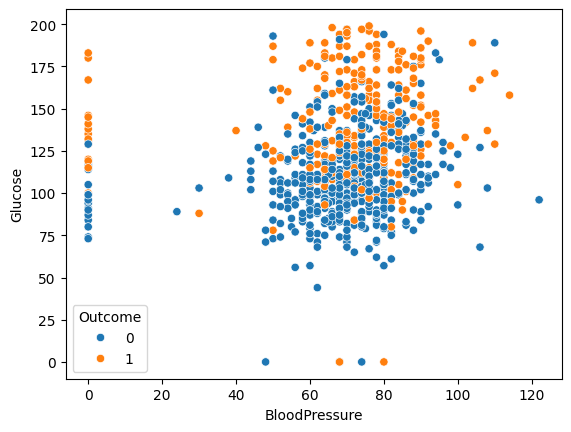

In [20]:
graph = sns.scatterplot(x = df["BloodPressure"],y = df["Glucose"] , hue =df["Outcome"])


**we can see higher glucose and high blood_pressure result to diabetes**

**Question :How insulin behaves when we got increased blood pressure and Glucose**

<Axes: xlabel='Glucose', ylabel='Insulin'>

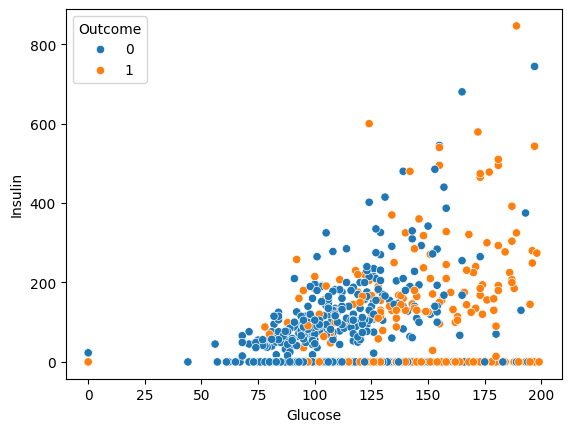

In [21]:
sns.scatterplot(x = df["Glucose"] , y = df["Insulin"] , hue =df["Outcome"])

<Axes: xlabel='BloodPressure', ylabel='Insulin'>

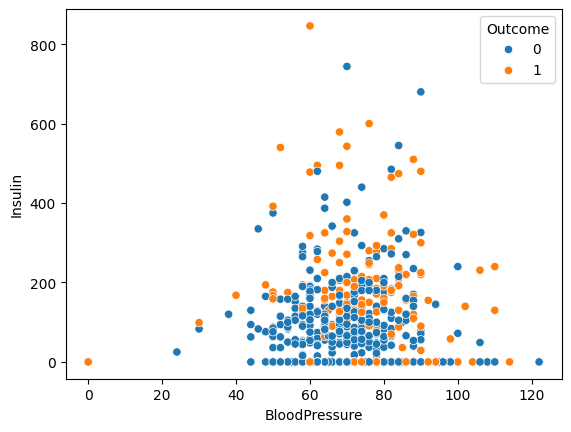

In [22]:
sns.scatterplot(x = df["BloodPressure"] , y = df["Insulin"] , hue =df["Outcome"])

**we easily able to observe that as the level of Blood_Presure and Glucose increases insulin is also increses**

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='BMI'>

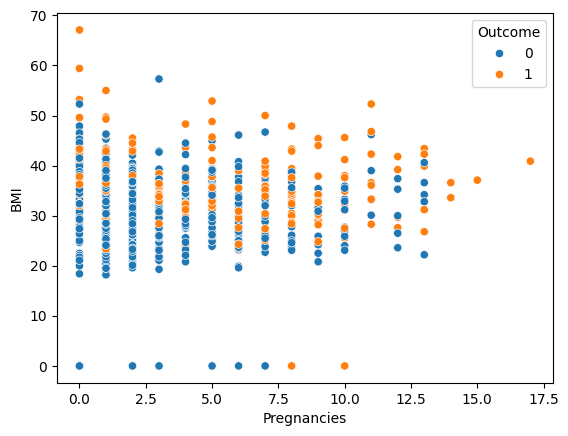

In [24]:
sns.scatterplot(x = df["Pregnancies"], y = df["BMI"] , hue= df["Outcome"])

**Higher the BMI results higher the chances to be diabetic**

# check the distribution of the individual column

<Axes: ylabel='Density'>

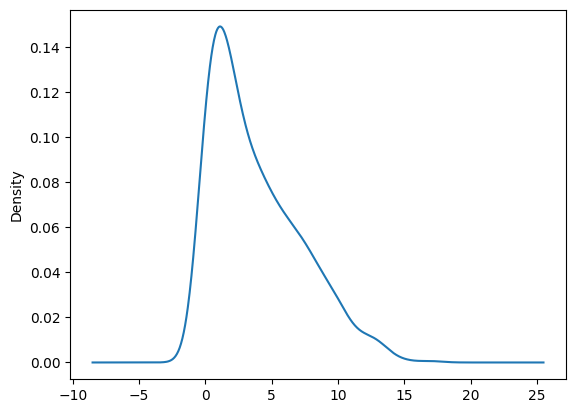

In [25]:
df["Pregnancies"].plot(kind = "kde")

<Axes: ylabel='Pregnancies'>

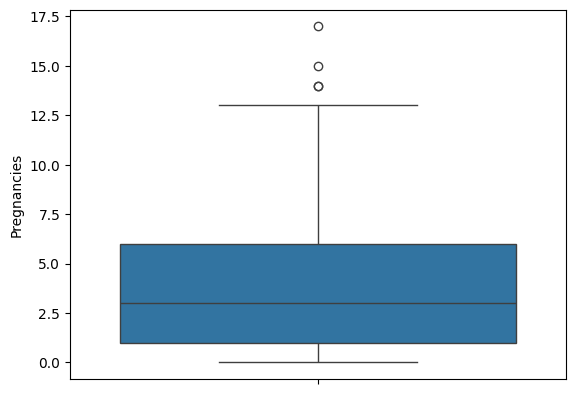

In [26]:
sns.boxplot(df["Pregnancies"])

In [27]:
df["Pregnancies"] = df["Pregnancies"].apply(lambda x : 12 if x >12 else x)

<Axes: ylabel='Density'>

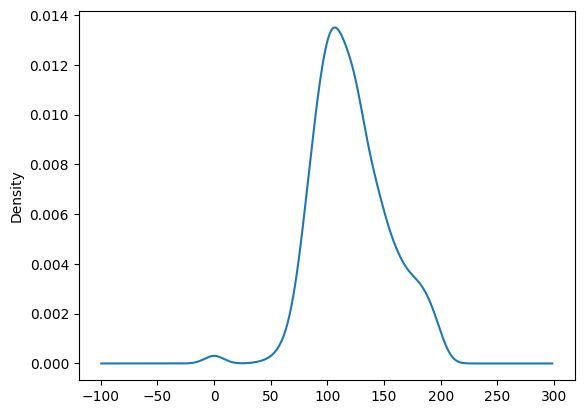

In [28]:
df["Glucose"].plot(kind = "kde")

<Axes: ylabel='Glucose'>

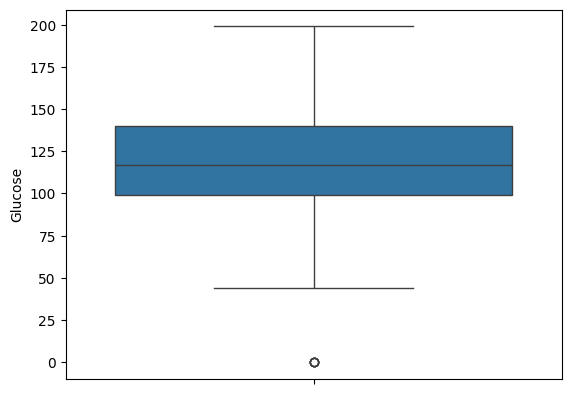

In [29]:
sns.boxplot(df["Glucose"])

In [30]:
df.groupby("Outcome")["Glucose"].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [31]:
data = df[df["Glucose"]<25]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [32]:
df["Glucose"] = np.where((df["Glucose"]) < 25 & (df["Outcome"] == 0 ) , 110 , 
                         (np.where((df["Glucose"] < 25 ) & (df["Outcome"] == 1 ),
                                   141, df["Glucose"])))

**Now our Distribution are more like gaussians**

<Axes: ylabel='Density'>

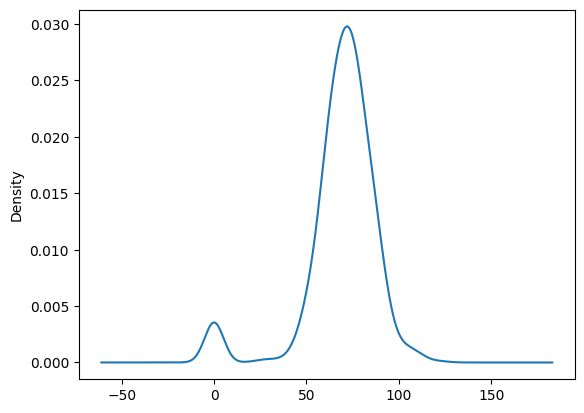

In [33]:
df["BloodPressure"].plot(kind = "kde")

<Axes: ylabel='BloodPressure'>

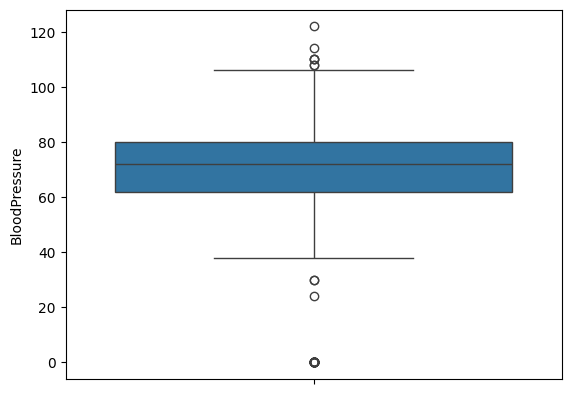

In [34]:
sns.boxplot(df["BloodPressure"])

In [35]:
Q1, Q3 = df["BloodPressure"].quantile([0.25 , 0.75])
IQR = Q3 - Q1 
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper , lower 

(107.0, 35.0)

In [36]:
df[(df["BloodPressure"] <35 ) | (df["BloodPressure"]>107)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


In [37]:
df.groupby("Outcome")["BloodPressure"].mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

In [38]:
# For bottom outliers
df["BloodPressure"] = np.where(((df["BloodPressure"] < 35) & (df["Outcome"] == 0)) ,
                              68 ,np.where(((df["BloodPressure"] < 35 ) & (df["Outcome"] == 1)) ,
                                         107 , df["BloodPressure"]))
# For upper outliers 
df["BloodPressure"] = np.where(((df["BloodPressure"] > 107) & (df["Outcome"] == 0)) ,
                               68 ,np.where(((df["BloodPressure"] > 107) & (df["Outcome"] == 1)) ,
                                           107 , df["BloodPressure"]))

<Axes: ylabel='BloodPressure'>

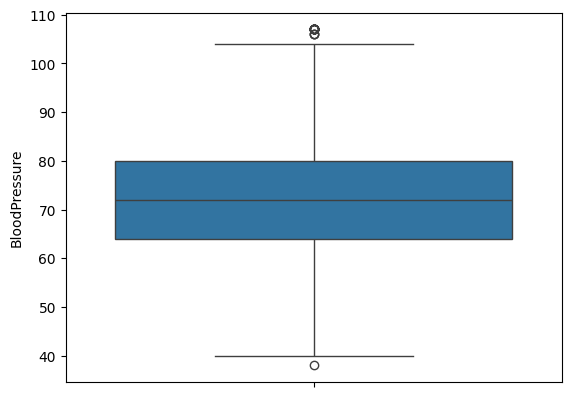

In [39]:
sns.boxplot(df["BloodPressure"])

In [40]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [41]:
# As per my research on Insulin it never be 0 even after it may be to low but not zero 
#Let's fill those values
#Using a technique called as iterative imputer works on MICE (Multivariate imputation by chained equation)

In [42]:
df["Insulin"] = df["Insulin"].replace(0, np.nan)

In [43]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [44]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer


In [45]:
imputer  = IterativeImputer()
imputed = imputer.fit_transform(df)
df1 = pd.DataFrame(imputed , columns = df.columns)

In [46]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.499254,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,70.376824,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,263.721165,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [47]:
df1["Insulin"] = df1["Insulin"].round(2)

In [48]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.50,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,70.38,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,263.72,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.00,43.1,2.288,33.0,1.0


In [49]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: ylabel='Insulin'>

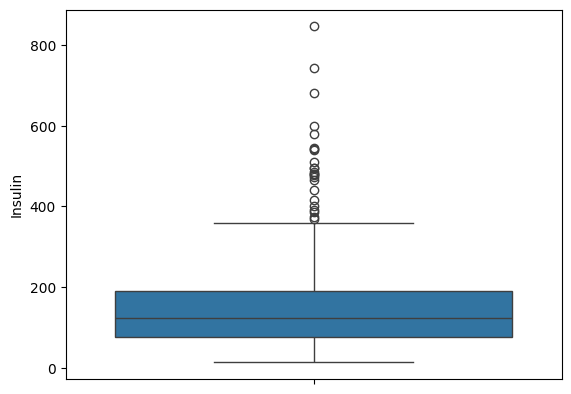

In [50]:
sns.boxplot(df["Insulin"])

<Axes: ylabel='Density'>

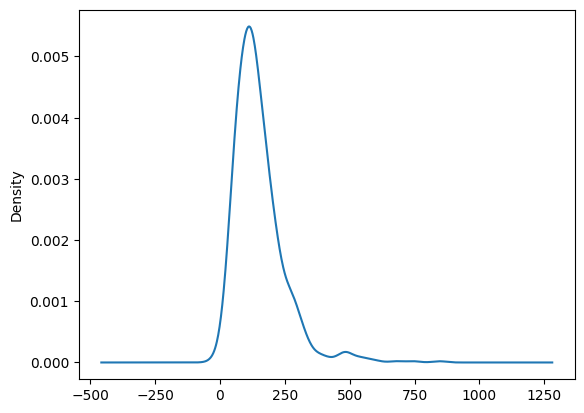

In [51]:
df1["Insulin"].plot(kind = "kde")

In [52]:
Q1 , Q3  = df1["Insulin"].quantile([0.25 , 0.75])
IQR  =  Q3 - Q1
lower = Q1 - IQR*1.5
upper = Q3 + IQR*1.5
upper  , lower

(330.86, -58.09999999999998)

In [53]:
data = df1[df1["Insulin"] >361] #used 361 based on research on data set 

In [54]:
df1["Insulin"] = df1["Insulin"].apply( lambda x : 360 if x>360 else x)

In [55]:
# Fitted upper boundry as 360 for Insulin 

<Axes: ylabel='Density'>

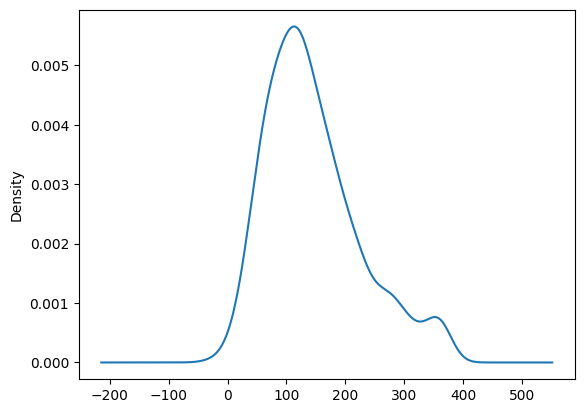

In [56]:
df1["Insulin"].plot(kind = "kde")

<Axes: ylabel='Insulin'>

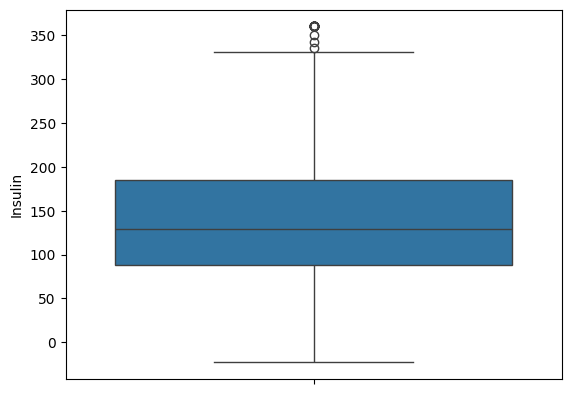

In [57]:
sns.boxplot(df1["Insulin"])

<Axes: ylabel='Density'>

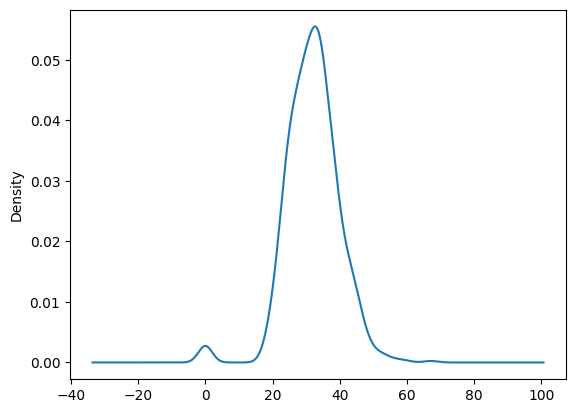

In [58]:
df1["BMI"].plot(kind = "kde")

In [59]:
df1["BMI"].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [60]:
# going to fill missing values in BMI column those are now as 0 with random between lower and upper bound

In [61]:
df1["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [62]:
# as we see lower and upper bound are unrealistic so in choosing a range of 25% to 75%

In [63]:
df1["BMI"] = np.where((df1["BMI"]<25),np.random.uniform(27,36),df["BMI"])
# BMI meter start from near 25

<Axes: ylabel='Density'>

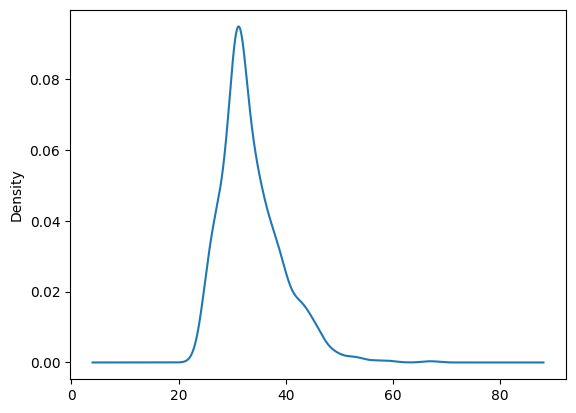

In [64]:
df1["BMI"].plot(kind = "kde")

<Axes: ylabel='BMI'>

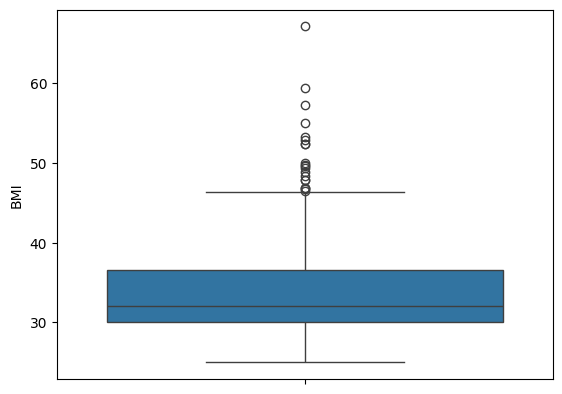

In [65]:
sns.boxplot(df1["BMI"])

In [66]:
Q1 , Q3 = df1["BMI"].quantile([0.25 , 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + IQR
upper_bound

43.1

In [67]:
df1["BMI"] = df1["BMI"].apply( lambda x  : 44.17 if x > 44.17 else x)

<Axes: ylabel='Density'>

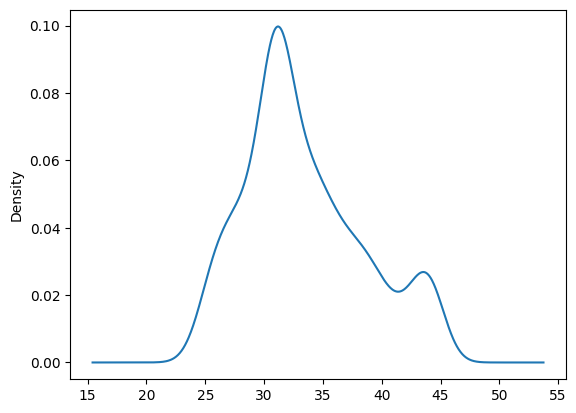

In [68]:
df1["BMI"].plot(kind = "kde")

In [69]:
df1.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.50,33.600000,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,70.38,26.600000,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,263.72,31.111566,0.672,32.0,1.0


In [70]:
df["BMI"] = df1["BMI"].round(2)

<Axes: ylabel='BMI'>

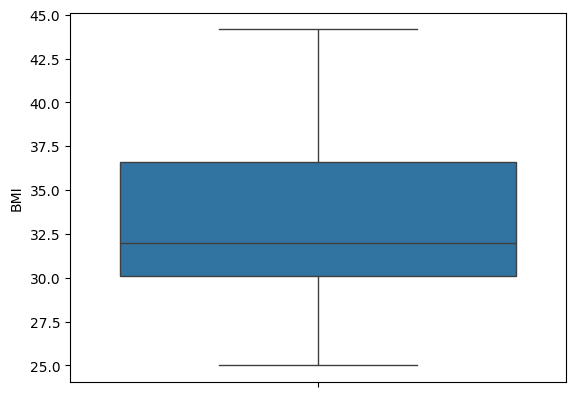

In [71]:
sns.boxplot(df1["BMI"])

In [72]:
df1["DiabetesPedigreeFunction"].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: ylabel='Density'>

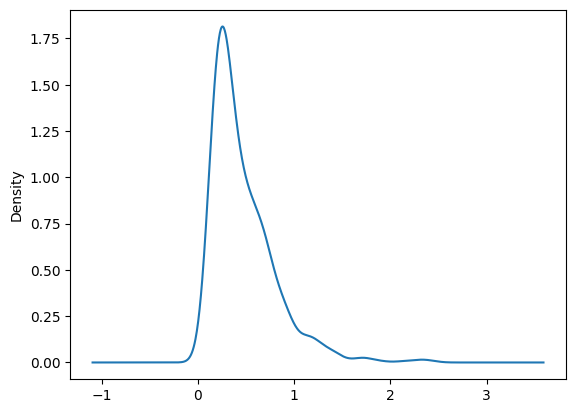

In [73]:
df1["DiabetesPedigreeFunction"].plot(kind= "kde")

<Axes: ylabel='Age'>

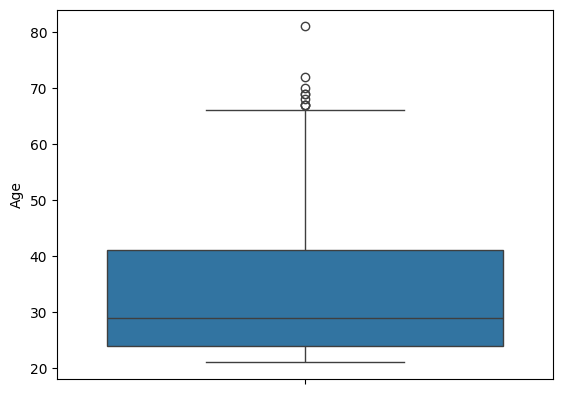

In [74]:
sns.boxplot(df1["Age"])

In [75]:
df1["Age"] = df1["Age"].apply( lambda x : 70 if x>70 else x)

<Axes: ylabel='Density'>

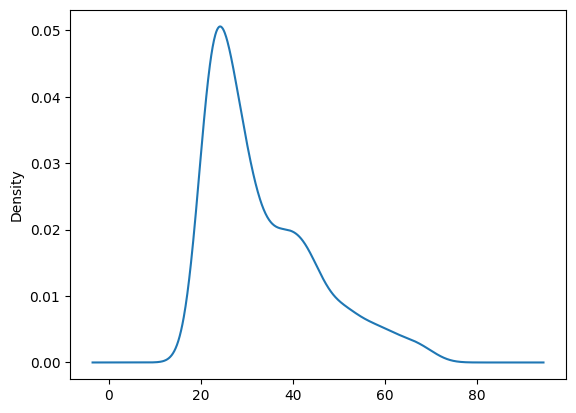

In [76]:
df1["Age"].plot(kind = "kde")

In [77]:
# it's possible that their is few peoples who are having more age so i am using 70 as maximum rather considering boxplot

In [78]:
#for dealing with confusion storing df1 in df
df1["BMI"] = df1["BMI"].round(2)
df = df1.copy()

**Exploratory data analysis is completed**

# Model Building

**Deciding what models going to use for model building**

**Logistic Regression.**

**Decision Tree.**

**SVM**

**Random Forest.**

**Kmeans**

**Naive bayes**

**XGBoost**

**later on try PCA**

**Ensembles techniques**

**Cross validation**

**Gridsearchcv** #parameter tuning 

# Logistic Regression 

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , recall_score
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.pipeline import make_pipeline , Pipeline  
from sklearn.compose import ColumnTransformer

In [80]:
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [81]:
# Splitting data for training and testing 
X = df.drop(columns= ['Outcome'])
y = df["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

In [82]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [83]:
y_train.shape , y_test.shape 

((614,), (154,))

In [84]:
#As we know all columns are numerical so that's why appling Standard scaler in complete dataframe 

In [85]:
pipeline_logistic = Pipeline([
    ("scaler", StandardScaler()), 
    ("logistic", LogisticRegression())
])
pipeline_logistic.fit(X_train , y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [86]:
y_pred = pipeline_logistic.predict(X_test)

In [87]:
print("Accuracy score :",accuracy_score(y_test, y_pred))
print("Recall Score :", recall_score(y_test , y_pred)) 
# false negative are not good for this model so that's why using recall score 
# and futher in model building try to minimize the Recall_score 

Accuracy score : 0.7662337662337663
Recall Score : 0.6363636363636364


In [88]:
#cross validation 
print("recall:",cross_val_score(pipeline_logistic , X_train , y_train , cv= 10, scoring="recall" ).mean())
print ("Accuracy:",cross_val_score(pipeline_logistic , X_train , y_train , cv= 10, scoring="accuracy" ).mean())

recall: 0.5534632034632034
Accuracy: 0.7670809095716551


# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree
# not need to standardiZe values for Decision Trees 

In [90]:
pipeline_D_Tree = Pipeline([
    ("D_tree", DecisionTreeClassifier(max_depth=3))
])
pipeline_D_Tree.fit(X_train , y_train)

Pipeline(steps=[('D_tree', DecisionTreeClassifier(max_depth=3))])

In [91]:
y_pred_D_tree = pipeline_D_Tree.predict(X_test)

In [92]:
print("Accuracy score :",accuracy_score(y_test, y_pred_D_tree))
print("Recall Score :", recall_score(y_test , y_pred_D_tree)) 

Accuracy score : 0.7207792207792207
Recall Score : 0.7454545454545455


In [93]:
#cross validation 
print("recall:",cross_val_score(pipeline_D_Tree , X_train , y_train , cv= 10, scoring="recall" ).mean())
print ("Accuracy:",cross_val_score(pipeline_D_Tree , X_train , y_train , cv= 10, scoring="accuracy" ).mean())

recall: 0.6339826839826839
Accuracy: 0.734479111581174


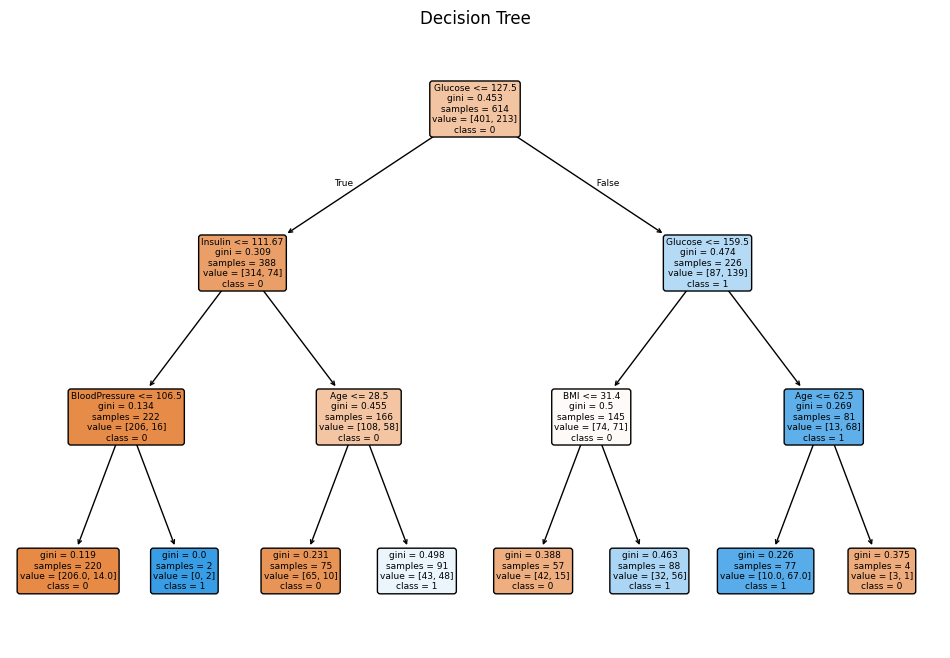

In [94]:
feature_names = X.columns
class_names = ['0', '1']
plt.figure(figsize=(12, 8))
plot_tree(pipeline_D_Tree.named_steps['D_tree'], 
          feature_names=feature_names, 
          class_names=class_names,
          filled=True, 
          rounded=True)
plt.title("Decision Tree")
plt.show()

In [95]:
#we are obsered that recall score of Decision is far better than logistic regression 

# SVM Classifier 

In [96]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [97]:
pipeline_svc = Pipeline([
    ("scaler", StandardScaler()), 
    ("svc", SVC())
])
pipeline_svc.fit(X_train ,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [98]:
y_pred_svc = pipeline_svc.predict(X_test)

In [99]:
print("Accuracy score :",accuracy_score(y_test, y_pred_svc))
print("Recall Score :", recall_score(y_test , y_pred_svc)) 

Accuracy score : 0.7597402597402597
Recall Score : 0.6545454545454545


In [100]:
#cross validation 
print("recall:",cross_val_score(pipeline_svc , X_train , y_train , cv= 10, scoring="recall" ).mean())
print ("Accuracy:",cross_val_score(pipeline_svc , X_train , y_train , cv= 10, scoring="accuracy" ).mean())

recall: 0.5303030303030303
Accuracy: 0.7459809624537282


In [101]:
#Again we are able to see Accuracy score is incresed that is good signs for our model 
#this may be  sign of overfitting 

# Random Forest 

In [102]:
from sklearn.ensemble import RandomForestClassifier
# for this we not need to Standardize the values

In [103]:
pipeline_forest = Pipeline([
    ("forest", RandomForestClassifier(n_estimators=100,max_depth=4 ))
])
pipeline_forest.fit(X_train , y_train)

Pipeline(steps=[('forest', RandomForestClassifier(max_depth=4))])

In [104]:
y_pred_forest  = pipeline_forest.predict(X_test)

In [105]:
print("Accuracy score :",accuracy_score(y_test, y_pred_forest))
print("Recall Score :", recall_score(y_test , y_pred_forest)) 

Accuracy score : 0.7337662337662337
Recall Score : 0.6363636363636364


In [106]:
print("recall:",cross_val_score(pipeline_forest , X_train , y_train  , cv= 10, scoring="recall" ).mean())
print ("accuracy:",cross_val_score(pipeline_forest , X_train , y_train , cv= 10, scoring="accuracy" ).mean())

recall: 0.567965367965368
accuracy: 0.7768640930724485


# KMeans

In [107]:
from sklearn.cluster import KMeans
# for this we need to standardize the values beacause this works on euclidian diastance 

In [108]:
pipline_Kmeans  = Pipeline([
    ("scaler",StandardScaler()),
    ("kmeans",KMeans(n_clusters = 5)) # on later we find elbow point for now let's use n_cluster with on train basis by using 3 ,4 values 
])
pipline_Kmeans.fit(X_train , y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=5))])

In [109]:
y_pred_kmeans = pipline_Kmeans.predict(X_test)

In [110]:
print("Accuracy score :",accuracy_score(y_test, y_pred_kmeans))

Accuracy score : 0.2077922077922078


In [111]:
# used many numbers as cluster but got maximum value at n_cluster = 5 but later we can do parameter tuining 
# or try to find elbow point

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

pipeline_nb.fit(X_train, y_train)

y_pred_nb = pipeline_nb.predict(X_test)

# Step 5: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Confusion Matrix:
 [[76 23]
 [14 41]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80        99
         1.0       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



In [114]:
# this perform good for our as per recall score 

In [115]:
print("recall:",cross_val_score(pipeline_nb , X_train , y_train  , cv= 10, scoring="recall" ).mean())
print ("accuracy:",cross_val_score(pipeline_nb , X_train , y_train , cv= 10, scoring="accuracy" ).mean())

recall: 0.6192640692640692
accuracy: 0.7540454785827604


In [188]:
# for now let's build model using best model later we continue the things 

**as we know till now Decision tree performed best on training data with recall score of 80%.**

**so let's use the Decision Tree to build a model**

In [191]:
import pickle

In [194]:
pickle.dump(pipeline_D_Tree, open('Models/daibetes_model.pkl', 'wb'))